In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objects as go
from itertools import combinations
from collections import Counter 
from collections import defaultdict


In [3]:
df = pd.read_csv("Resturant Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df_cleaned = df[df.isnull().any(axis=1) == False]
df_cleaned

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [9]:
df_cleaned.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df1=df_cleaned

In [11]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Level 1
### Task 1 -  Top Cuisines

#### 1. Determine the top three most common cuisines in the dataset.

In [10]:
df1['Cuisines'].value_counts().head(3)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

#### 2. Percentage of restaurant that serve the top cuisines

In [134]:
dt= df1['Cuisines'].value_counts('Restaurant Name').mul(100).head(3)
dt

Cuisines
[North Indian]              9.809264
[North Indian,  Chinese]    5.355271
[Chinese]                   3.709914
Name: proportion, dtype: float64

### Task 2- City Analysis

#### 3. Identify the city with the highest number of restaurants in the dataset

In [12]:
df1['City'].value_counts()

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64

#### 4. Calculate the average rating for restaurants in each city.

In [130]:
df1.groupby('City')['Aggregate rating'].mean()

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64

#### 5. Determine the city with th highest average rating.

In [143]:
city=df1.groupby('City')['Aggregate rating'].mean()
city_sorted_df = city.sort_values()
city_sorted_df.tail(5)

City
Mandaluyong City    4.625000
Pasig City          4.633333
Makati City         4.650000
Quezon City         4.800000
Inner City          4.900000
Name: Aggregate rating, dtype: float64

### Task 3 - Price Range Distribution

In [15]:
df1['Average Cost for two'].value_counts()

Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64

In [18]:
df1['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

#### 5. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [124]:
df1['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

<Axes: xlabel='Price range'>

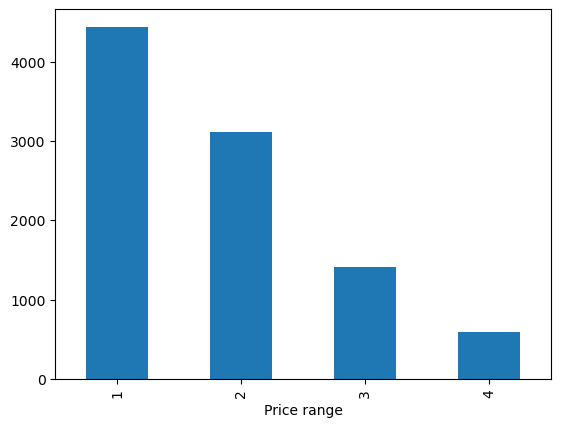

In [127]:
price_counts = df1['Price range'].value_counts().plot(kind='bar')
price_counts

#### 6. Calculate the percentage of restaurants in each price range category.

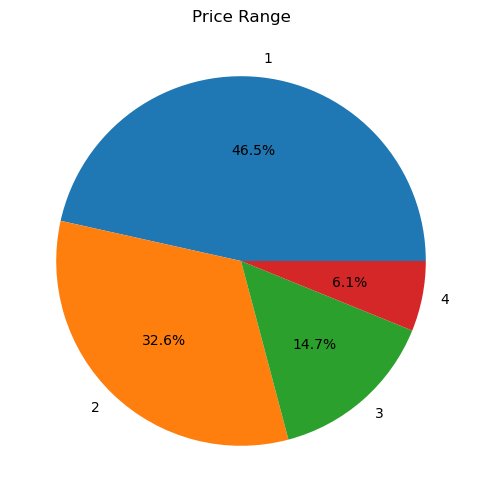

In [158]:
price= df1['Price range'].value_counts('Restaurant Name').mul(100)
price
plt.figure(figsize=(12, 6))
plt.pie(price, labels= price.index, autopct='%1.1f%%')
plt.title('Price Range')
plt.show()

### Task 4 -  Online Delivery

#### 1. Determine the percentage of restaurants that offer online delivery.

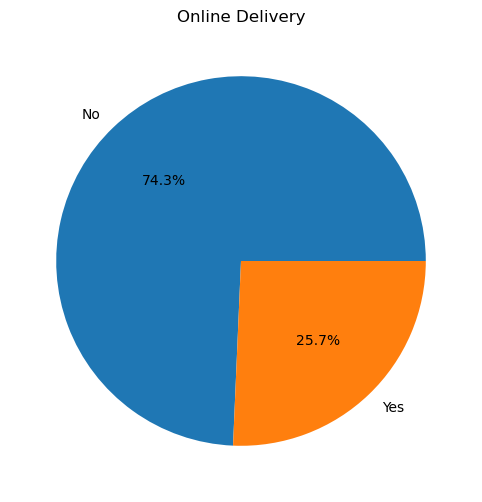

In [52]:
delivery = df1['Has Online delivery'].value_counts().mul(100)
delivery
plt.figure(figsize=(12, 6))
plt.pie(delivery, labels= delivery.index,autopct='%1.1f%%')
plt.title('Online Delivery')
plt.show()

#### 2. Compare the average ratings of restaurants with and without online delivery.

In [16]:
total=df1['Aggregate rating'].mean()
total

2.665237895619367

In [17]:
total1=df1.groupby('Has Online delivery')['Aggregate rating'].mean()
total1

Has Online delivery
No     2.463517
Yes    3.248837
Name: Aggregate rating, dtype: float64

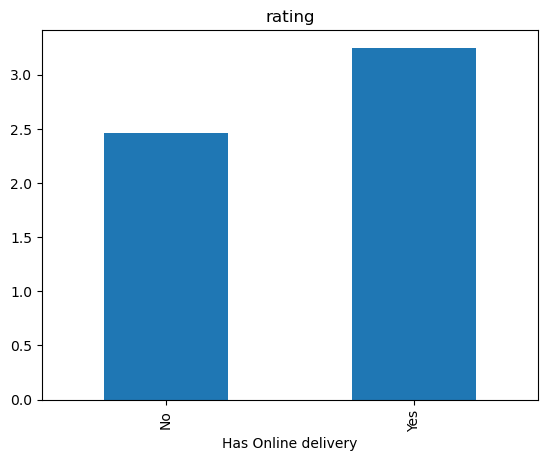

In [18]:
rate= df1.groupby('Has Online delivery')['Aggregate rating'].mean().plot(kind='bar')
plt.title('rating')
plt.show()

### Level 2
#### Task 1 -  Restaurant Ratings

#### 1. Analyze the distribution of aggregate ratings and determine the most common rating range.

In [101]:
rating_counts = df1['Aggregate rating'].value_counts()
print("Unique Ratings and Counts:")
for rating, count in rating_counts.items():
  print(rating, count)

Unique Ratings and Counts:
0.0 2148
3.2 522
3.1 519
3.4 495
3.3 483
3.5 480
3.0 468
3.6 458
3.7 427
3.8 399
2.9 381
3.9 332
2.8 315
4.1 274
4.0 266
2.7 250
4.2 221
2.6 191
4.3 174
4.4 143
2.5 110
4.5 95
2.4 87
4.6 78
4.9 61
2.3 47
4.7 41
2.2 27
4.8 25
2.1 15
2.0 7
1.9 2
1.8 1


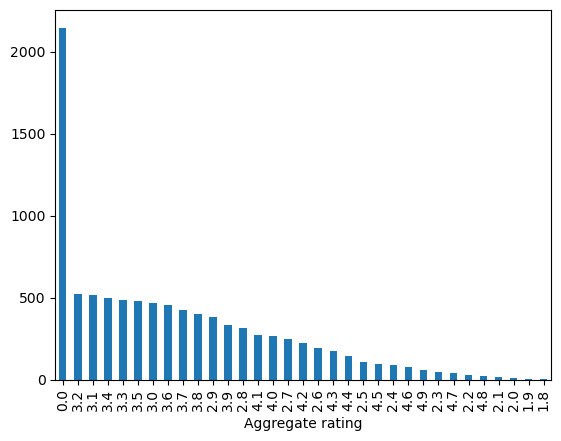

In [23]:
avg_rate=df1['Aggregate rating'].value_counts().plot(kind = 'bar')
avg_rate
plt.show()

The most common type of Rating is 0.0

#### 2.Calculate the average number of votes received by restaurants.

In [162]:
df1['Votes'].mean()

156.7720603647034

### Task 2 - Cuisine Combination

##### 1. Identify the most common combinations of cuisines in the dataset.

In [24]:

# Split the cuisines for each restaurant into a list, handling NaNs
df1['Cuisines'] = df1['Cuisines'].str.split(',')

# Create a list of all combinations of cuisines
cuisine_combinations = []
for cuisines in df1['Cuisines']:
    if len(cuisines) > 1:
        cuisine_combinations.extend(combinations(cuisines, 2))

# Count the frequency of each combination
combination_counts = Counter(cuisine_combinations)

# Get the most common combinations
most_common_combinations = combination_counts.most_common(10)

most_common_combinations

[(('North Indian', ' Chinese'), 1314),
 (('North Indian', ' Mughlai'), 689),
 (('North Indian', ' Fast Food'), 296),
 (('North Indian', ' South Indian'), 258),
 (('Bakery', ' Desserts'), 254),
 (('North Indian', ' Continental'), 249),
 ((' Mughlai', ' Chinese'), 230),
 ((' North Indian', ' Chinese'), 202),
 (('Chinese', ' North Indian'), 202),
 (('Bakery', ' Fast Food'), 196)]

Most common combo is "North Indian, Chinese", 1314

In [110]:
df1['Cuisines'].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Most common combo is "North Indian, Chinese"

##### 2. Determine if certain cuisine combinations tend to have higher ratings.

In [39]:
df1['Cuisine List'] = df1['Cuisines'].apply(lambda x: str(x).split(', ') if pd.notnull(x) else [])
combination_ratings = defaultdict(list)
for cuisines, rating in zip(df1['Cuisine List'], df1['Aggregate rating']):
    if isinstance(cuisines, list) and len(cuisines) > 1:
        for combo in combinations(cuisines, 2):
            combination_ratings[combo].append(rating)
average_ratings = {combo: sum(ratings) / len(ratings) for combo, ratings in combination_ratings.items()}
average_ratings_df = pd.DataFrame(average_ratings.items(), columns=['Cuisine Combination', 'Average Rating'])
sorted_ratings_df = average_ratings_df.sort_values(by='Average Rating', ascending=False)
sorted_ratings_df.head(10)

,Cuisine Combination,Average Rating
189,"(American, Coffee and Tea)",4.90
259,"(Sandwich, Tea)",4.90
1347,"(Sunda, Indonesian)",4.90
751,"(Mexican, Healthy Food)",4.90
178,"(BBQ, Breakfast)",4.90
16,"(European, Indian)",4.90
130,"(American, Caribbean)",4.90
17,"(Filipino, Mexican)",4.85
360,"(European, German)",4.80
0,"(French, Japanese)",4.80


### Task 3 -  Geographic Analysis

#### 1. Plot the locations of restaurants on a map using longitude and latitude coordinates.

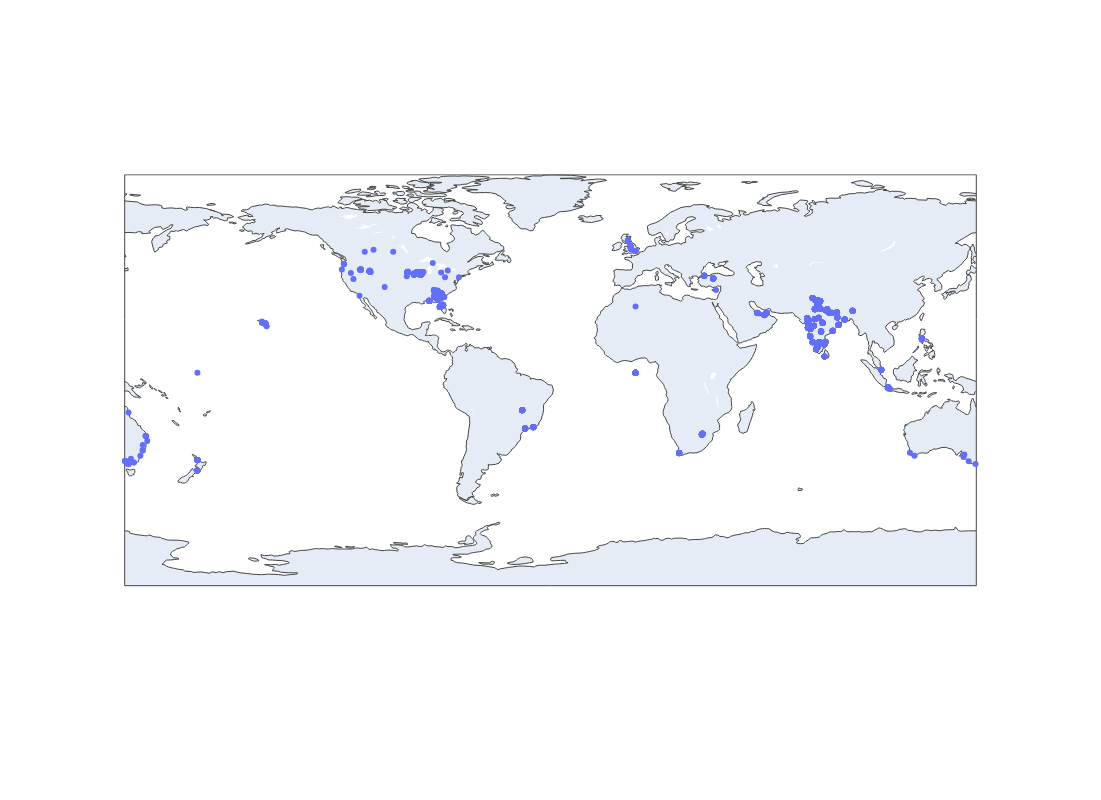

In [121]:
latitudes = df1['Latitude']
longitudes = df1['Longitude']
fig = go.Figure()

# Add trace
fig.add_trace(go.Scattergeo(
              lat = latitudes,
              lon = longitudes,
              text = df1['City'],
              mode='markers',
)) 
fig.update_layout(
    width=1000,  # Adjust width as needed
    height=800  # Adjust height as needed
)

fig.show()

##### 2. Identify any patterns or clusters of restaurants in specific areas.

from above we can see a cluster of resturants from INDIA, Southeast AUSTRALIA, FLORIDA AND IOWA from USA.

#### Task 4 - Restaurant Chains

##### 1. Identify if there are any restaurant chains present in the dataset.

In [50]:
restaurant_counts = df1['Restaurant Name'].value_counts()
restaurant_counts

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64

##### 2. Analyze the ratings and popularity of different restaurant chains.

In [47]:
restaurant_counts = df1['Restaurant Name'].value_counts()
potential_chains = restaurant_counts[restaurant_counts > 1]
chains_data = df1[df1['Restaurant Name'].isin(potential_chains.index)]
chain_stats = chains_data.groupby('Restaurant Name').agg({'Aggregate rating': 'mean','Restaurant ID': 'count'}).rename(columns={'Aggregate rating': 'Average Rating', 'Restaurant ID': 'Popularity'})
sorted_chain_stats = chain_stats.sort_values(by=['Popularity', 'Average Rating'], ascending=[False, False])
sorted_chain_stats.head(10)

,Average Rating,Popularity
Restaurant Name,,
Cafe Coffee Day,2.419277,83
Domino's Pizza,2.740506,79
Subway,2.907937,63
Green Chick Chop,2.672549,51
McDonald's,3.339583,48
Keventers,2.870588,34
Pizza Hut,3.320000,30
Giani,2.689655,29
Baskin Robbins,1.860714,28


### Level 3
#### Task 1 -   Restaurant Reviews

##### 1. Analyze the text reviews to identify the most common positive and negative keywords.

<Axes: xlabel='Rating text'>

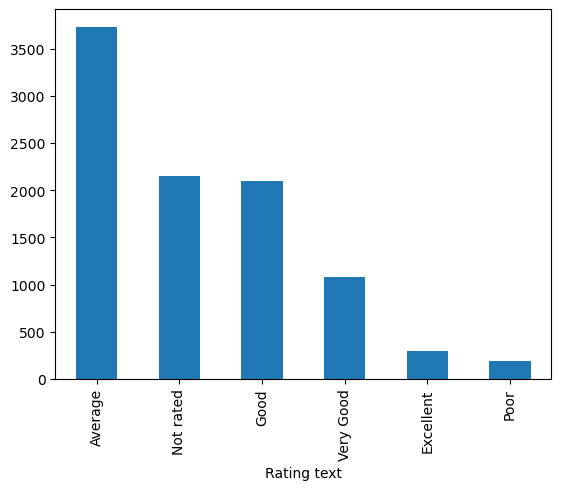

In [59]:
df1['Rating text'].value_counts().plot(kind = 'bar')

##### 2. Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [68]:
compare = df1.groupby ('Rating text')['Aggregate rating'].value_counts()
compare

Rating text  Aggregate rating
Average      3.2                  522
             3.1                  519
             3.4                  495
             3.3                  483
             3.0                  468
             2.9                  381
             2.8                  315
             2.7                  250
             2.6                  191
             2.5                  110
Excellent    4.5                   95
             4.6                   78
             4.9                   61
             4.7                   41
             4.8                   25
Good         3.5                  480
             3.6                  458
             3.7                  427
             3.8                  399
             3.9                  332
Not rated    0.0                 2148
Poor         2.4                   87
             2.3                   47
             2.2                   27
             2.1                   15
             2.0    

<Axes: xlabel='Rating text,Aggregate rating'>

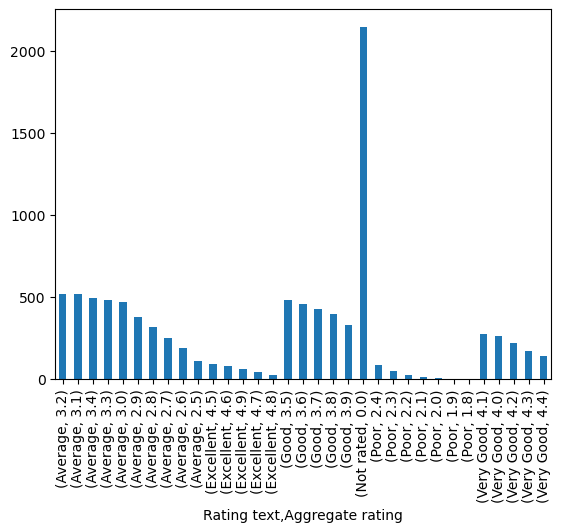

In [66]:
compare = df1.groupby ('Rating text')['Aggregate rating'].value_counts().plot(kind = 'bar')
compare

#### Task 2 - Votes Analysis

##### 1.Identify the restaurants with the highest and lowest number of votes.

In [60]:
vote = df1['Restaurant Name'].value_counts()
vote

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64

##### 2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

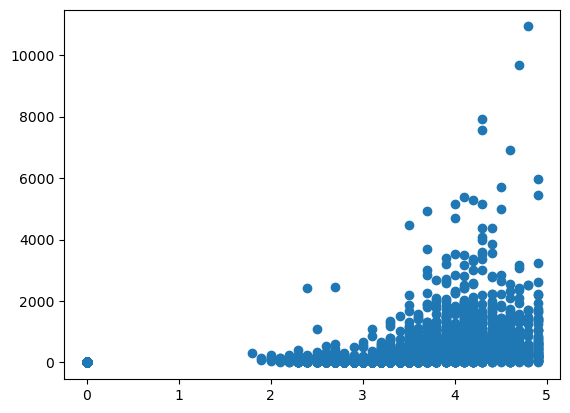

In [72]:
plt.scatter('Aggregate rating','Votes', data=df1)

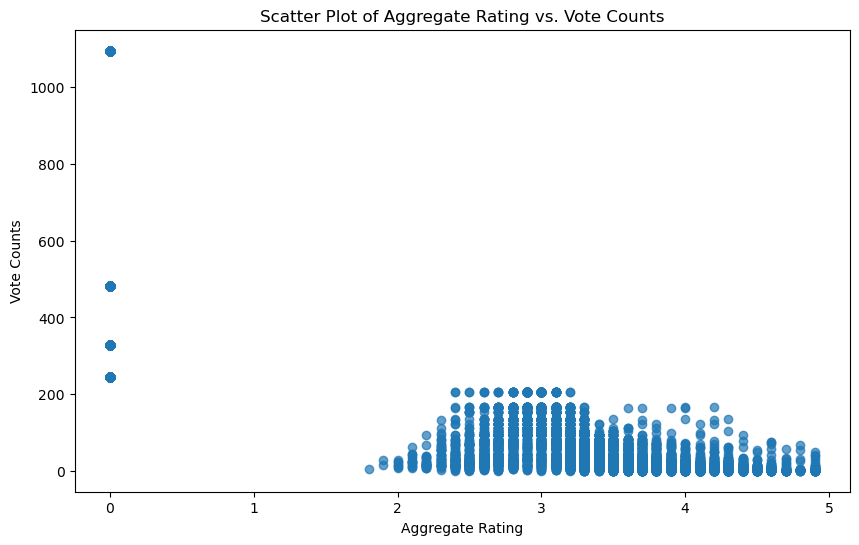

In [75]:
vote_counts = df1['Votes'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df1['Aggregate rating'], df1['Votes'].map(vote_counts), alpha=0.7)
plt.xlabel('Aggregate Rating')
plt.ylabel('Vote Counts')
plt.title('Scatter Plot of Aggregate Rating vs. Vote Counts')
plt.show()

### Task 3 - Price Range vs. Online Delivery and Table Booking

##### 1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [99]:
corr=df1[['Price range','Has Online delivery','Has Table booking']]
corr

,Price range,Has Online delivery,Has Table booking
0,3,No,Yes
1,3,No,Yes
2,4,No,Yes
3,4,No,No
4,4,No,Yes
...,...,...,...
9546,3,No,No
9547,3,No,No
9548,4,No,No
9549,4,No,No


<Axes: xlabel='Price range', ylabel='count'>

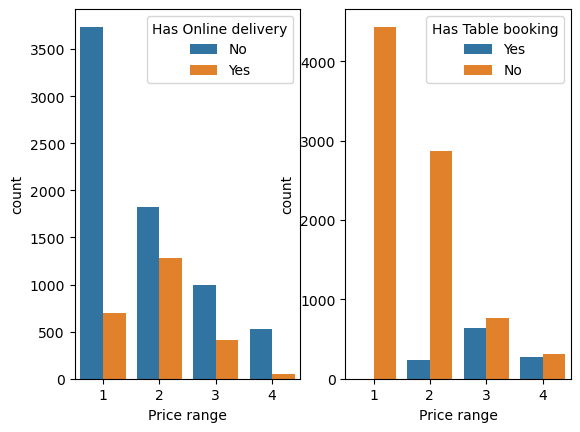

In [129]:
plt.subplot (1,2,1)
sns.countplot(data=df1, x="Price range", hue="Has Online delivery")
plt.subplot (1,2,2)
sns.countplot(data=df1, x="Price range", hue="Has Table booking")

##### 2. Determine if higher-priced restaurants are more likely to offer these services.

the higher-priced resturants offer these service in less compared to the resturants that re in the mid-price ranged